In [62]:
!nvidia-smi

NotImplementedError: ignored

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
!pip install pyyaml==5.1

import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
# !pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
# If there is not yet a detectron2 release that matches the given torch + CUDA version, you need to install a different pytorch.
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

NotImplementedError: ignored

In [64]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [65]:
%cd /content/drive/MyDrive/Detectron2

/content/drive/MyDrive/Detectron2


In [66]:
!pwd

NotImplementedError: ignored

In [67]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("sample", {}, "/content/drive/MyDrive/Detectron2/data/trainval.json", "/content/drive/MyDrive/Detectron2/data/images")

AssertionError: ignored

In [68]:
sample_metadata = MetadataCatalog.get("sample")
dataset_dicts = DatasetCatalog.get("sample")

WARNING [10/24 10:26:17 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[10/24 10:26:17 d2.data.datasets.coco]: Loaded 51 images in COCO format from /content/drive/MyDrive/Detectron2/data/trainval.json


In [69]:
# dataset_dicts

In [70]:
import random

for d in random.sample(dataset_dicts, 4):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=sample_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

Output hidden; open in https://colab.research.google.com to view.

In [71]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml"))
cfg.DATASETS.TRAIN = ("sample",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.0025  # pick a good LR
cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 14  # (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[10/24 10:26:39 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[10/24 10:26:39 d2.engine.train_loop]: Starting training from iteration 0
[10/24 10:26:50 d2.utils.events]:  eta: 0:02:22  iter: 19  total_loss: 3.889  loss_cls: 2.518  loss_box_reg: 0.5857  loss_mask: 0.692  loss_rpn_cls: 0.0397  loss_rpn_loc: 0.01413    time: 0.4856  last_time: 0.6285  data_time: 0.0342  last_data_time: 0.0217   lr: 0.00016068  max_mem: 2744M
[10/24 10:26:59 d2.utils.events]:  eta: 0:02:10  iter: 39  total_loss: 2.218  loss_cls: 0.8956  loss_box_reg: 0.6143  loss_mask: 0.6389  loss_rpn_cls: 0.02717  loss_rpn_loc: 0.01026    time: 0.4896  last_time: 0.5250  data_time: 0.0106  last_data_time: 0.0034   lr: 0.00032718  max_mem: 2799M
[10/24 10:27:10 d2.utils.events]:  eta: 0:02:03  iter: 59  total_loss: 1.89  loss_cls: 0.7009  loss_box_reg: 0.636  loss_mask: 0.5434  loss_rpn_cls: 0.01869  loss_rpn_loc: 0.01287    time: 0.4996  last_time: 0.5180  data_time: 0.0128  last_data_time: 0.0056   lr: 0.00049367  max_mem: 2799M
[10/24 10:27:20 d2.utils.events]:  eta: 0:01:53  ite

In [72]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "/content/drive/MyDrive/Detectron2/output/model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("sample", )
predictor = DefaultPredictor(cfg)

[10/24 10:30:28 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/Detectron2/output/model_final.pth ...


In [ ]:
%pwd

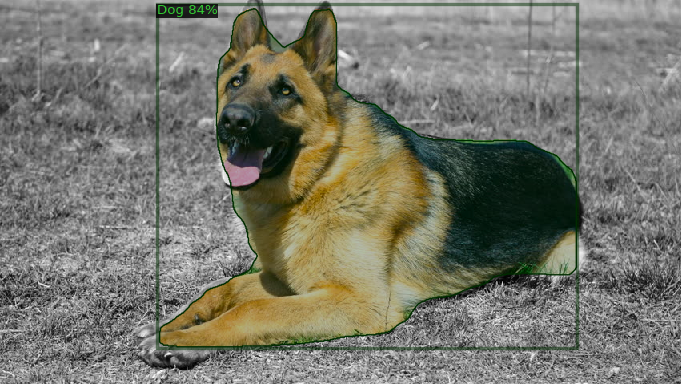

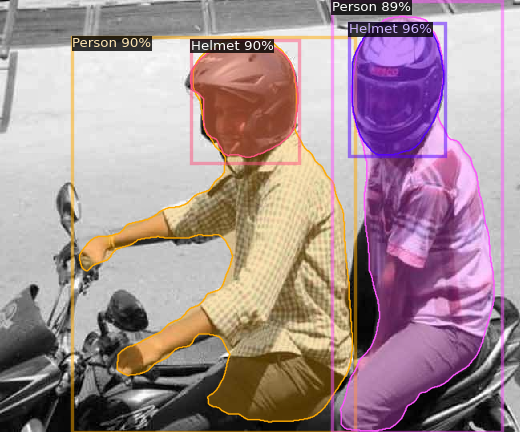

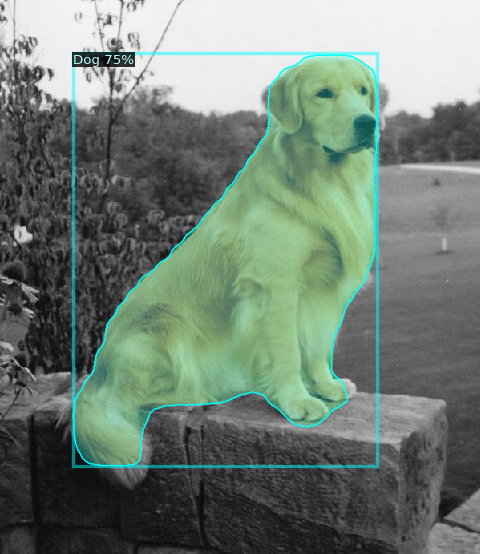

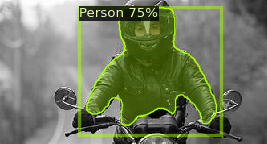

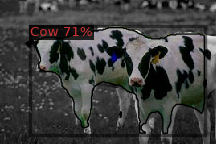

In [73]:
from detectron2.utils.visualizer import ColorMode
import os
import cv2

data_path = "/content/drive/MyDrive/Detectron2/test_data/"

for d in os.listdir("test_data"):
    im = cv2.imread(data_path + d)
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=sample_metadata,
                   scale=0.8,
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

In [74]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 4):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=sample_metadata,
                   scale=0.8,
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

Output hidden; open in https://colab.research.google.com to view.

# Evaluation

In [75]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("sample", output_dir= "./output")
val_loader = build_detection_test_loader(cfg, "sample")
print(inference_on_dataset(predictor.model, val_loader, evaluator))

WARNING [10/24 10:31:31 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[10/24 10:31:31 d2.data.datasets.coco]: Loaded 51 images in COCO format from /content/drive/MyDrive/Detectron2/data/trainval.json
[10/24 10:31:31 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/24 10:31:31 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/24 10:31:31 d2.data.common]: Serializing 51 elements to byte tensors and concatenating them all ...
[10/24 10:31:31 d2.data.common]: Serialized dataset takes 0.13 MiB
[10/24 10:31:31 d2.evaluation.evaluator]: Start inference on 51 batches
[10/24 10:31:34 d2.evaluation.evaluator]: Inference done 11/51. Dataloading: 0.0073 s/iter. Inference: 0.1685 s/iter. Eval: 0.0051 s/iter. Total: 0.1809 s/iter. ETA=0:00:07
[10/24 10:31:39 d2.

## Getting the custom config file

In [ ]:
pwd

In [76]:
f = open('config.yml', 'w')
f.write(cfg.dump())
f.close()